In [2]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
from tensorflow.keras import models,backend,layers,models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from os import scandir
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# replace with the database's path 
path="/content/drive/MyDrive/coil-100/"
files=[]
i=0
for arc in os.listdir(path):
  i+=1
  if arc[-1]=="g" and i%5==0:
    files.append(arc)

files.sort()
files=files[:300]
print(files)

['obj100__105.png', 'obj100__115.png', 'obj100__135.png', 'obj100__150.png', 'obj100__255.png', 'obj100__290.png', 'obj100__30.png', 'obj100__35.png', 'obj100__50.png', 'obj100__70.png', 'obj100__90.png', 'obj10__0.png', 'obj10__120.png', 'obj10__160.png', 'obj10__175.png', 'obj10__195.png', 'obj10__20.png', 'obj10__215.png', 'obj10__225.png', 'obj10__305.png', 'obj10__320.png', 'obj10__340.png', 'obj10__5.png', 'obj10__75.png', 'obj10__80.png', 'obj11__120.png', 'obj11__125.png', 'obj11__140.png', 'obj11__145.png', 'obj11__15.png', 'obj11__160.png', 'obj11__175.png', 'obj11__185.png', 'obj11__195.png', 'obj11__215.png', 'obj11__230.png', 'obj11__240.png', 'obj11__265.png', 'obj11__330.png', 'obj11__95.png', 'obj12__10.png', 'obj12__100.png', 'obj12__110.png', 'obj12__125.png', 'obj12__135.png', 'obj12__195.png', 'obj12__250.png', 'obj12__260.png', 'obj12__265.png', 'obj12__315.png', 'obj12__355.png', 'obj12__40.png', 'obj12__50.png', 'obj12__55.png', 'obj13__115.png', 'obj13__130.png'

In [3]:
#guardado de imagenes

x=[]
y=[]

for fil in files:
  image = load_img(path+fil, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))

  x.append(image)
  label=fil.split("_")[0]
  label=label.split("j")[1]
  y.append( int(label) )

#codificación de etiquetas


xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.2)

xTrain= np.array(xTrain)
yTrain=  np.array(yTrain)
xTest= np.array(xTest)
yTest=  np.array(yTest)


plt.figure(figsize=(18,18))

# for image,label,i in zip(xTrain,yTrain,range(10)):
#   print(label)
#   plt.subplot(10,1,i+1)
#   plt.imshow(image,cmap='binary')

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

In [4]:
model=models.Sequential([
                               layers.Conv2D(40,kernel_size=3,strides=1,padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(224,224,3)),
                               layers.MaxPool2D(pool_size=2),
                               layers.Conv2D(80,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               layers.MaxPool2D(pool_size=2),
                               layers.Conv2D(100,kernel_size=3,strides=2,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               layers.MaxPool2D(pool_size=2),
                               layers.Flatten(),
                               layers.Dense(50,activation='relu',kernel_initializer='he_uniform'),
                               layers.Dense(20,activation='relu',kernel_initializer='he_uniform'),
                               layers.Dense(101,activation='softmax')
])

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [5]:
history=model.fit(xTrain,yTrain,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
8/8 [==============================] - 24s 3s/step - loss: 104.3695 - acc: 0.0167 - val_loss: 7.7702 - val_acc: 0.0833
Epoch 2/20
8/8 [==============================] - 23s 3s/step - loss: 5.0136 - acc: 0.0625 - val_loss: 4.0837 - val_acc: 0.0667
Epoch 3/20
8/8 [==============================] - 23s 3s/step - loss: 3.9811 - acc: 0.0667 - val_loss: 3.5863 - val_acc: 0.1667
Epoch 4/20
8/8 [==============================] - 23s 3s/step - loss: 3.1521 - acc: 0.2458 - val_loss: 3.1722 - val_acc: 0.2000
Epoch 5/20
8/8 [==============================] - 23s 3s/step - loss: 2.0386 - acc: 0.4625 - val_loss: 2.1167 - val_acc: 0.4667
Epoch 6/20
8/8 [==============================] - 23s 3s/step - loss: 1.2891 - acc: 0.6667 - val_loss: 1.6168 - val_acc: 0.6000
Epoch 7/20
8/8 [==============================] - 23s 3s/step - loss: 0.9682 - acc: 0.7083 - val_loss: 1.8805 - val_acc: 0.5333
Epoch 8/20
8/8 [==============================] - 23s 3s/step - loss: 0.9265 - acc: 0.7500 - val_loss:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


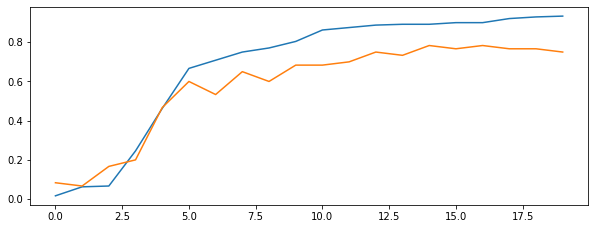

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(history.history['acc'], label='Entrenamiento')
plt.subplot(211)
plt.plot(history.history['val_acc'], label='prueba')